In [1]:
import numpy as np
import pandas as pd


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_excel('Sample_Submission.xlsx')


In [4]:
print(train.head())
train.shape

   Day  GrocerySales
0    1       8418.59
1    2       8447.47
2    3       8336.49
3    4       8579.17
4    5       8524.31


(692, 2)

In [5]:
print(test.head())
test.shape

   Day
0  693
1  694
2  695
3  696
4  697


(90, 1)

In [6]:
print(sample.head())
sample.shape

   GrocerySales
0   8606.187433
1   8973.760000
2   8946.170000
3   9138.900000
4   9012.110000


(90, 1)

In [7]:
train.isnull().sum()

Day             0
GrocerySales    0
dtype: int64

In [8]:
#Univirate Analysis
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(train['GrocerySales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2258f58fd48>,
 'caps': [<matplotlib.lines.Line2D at 0x2258f598d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2258f58f488>],
 'medians': [<matplotlib.lines.Line2D at 0x2258f59dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2258f59ddc8>],
 'means': []}

In [9]:
#Deleating outliers
# We are deleting the outliers from quartile 27th percentile and 73th percentile as appropriate for our model.

Q1 = train.quantile(0.27)
Q3 = train.quantile(0.73)
IQR = Q3 - Q1
print(IQR)

Day             317.860000
GrocerySales    406.897763
dtype: float64


In [10]:
train.shape

(692, 2)

In [12]:
train1 = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis = 1)]
train1.shape

(629, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2259085af48>,
 'caps': [<matplotlib.lines.Line2D at 0x22590860a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2259085a948>],
 'medians': [<matplotlib.lines.Line2D at 0x225908665c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22590866b48>],
 'means': []}

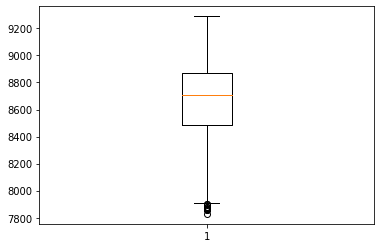

In [13]:
plt.boxplot(train1['GrocerySales'])

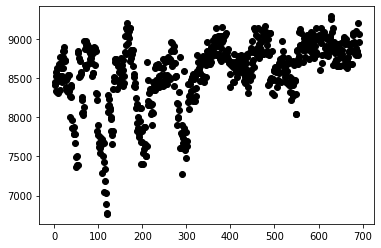

In [14]:
plt.scatter(train['Day'], train['GrocerySales'], color = 'black')

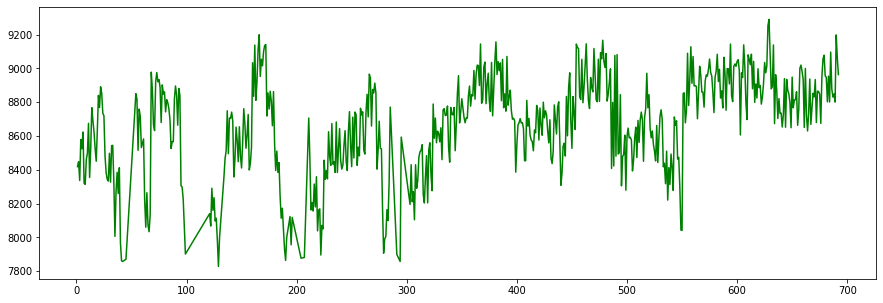

In [16]:
fig = plt.figure(figsize = (15, 5))
plt.plot(train1['Day'], train1['GrocerySales'], color = 'green', markersize = 1)

In [17]:
X = train1['Day'].copy()
X.head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [18]:
y = train1['GrocerySales'].copy()
y.head()

0    8418.59
1    8447.47
2    8336.49
3    8579.17
4    8524.31
Name: GrocerySales, dtype: float64

In [20]:
X = np.array(train1['Day'])
X = X.reshape(-1, 1)
X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 45],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
      

Split the data

In [22]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

Linear Regression

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predict = regr.predict(val_X)
print('Mean Squared error: %.2f' % mean_squared_error(val_y, predict))

Mean Squared error: 66438.76


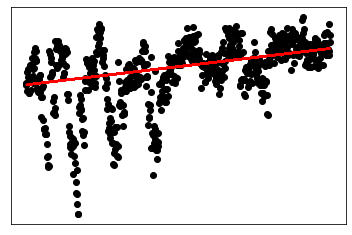

In [29]:
plt.scatter(train['Day'], train['GrocerySales'], color = 'black')
plt.plot(val_X, predict, color = 'red', linewidth = 2)

plt.xticks(())
plt.yticks(())

plt.show()

KNeighborsRegressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor()
neigh.fit(train_X, train_y)
predict_n = neigh.predict(val_X)
print('Mean squared error: %.2f' % mean_squared_error(val_y, predict_n))

Mean squared error: 25056.06


Tuning of KNeighborsRegressor 

In [33]:
parameters_for_testing = {
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':[1, 4, 2],
    'weights':['uniform', 'distance'],
    
}

In [34]:
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(cv = 8, estimator = neigh, param_grid = parameters_for_testing, n_jobs = -1, verbose = 0, scoring = 'neg_mean_squared_error')
gsearch1.fit(train_X, train_y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 4, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [35]:
print(gsearch1.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [36]:
print(gsearch1.best_score_)

-26270.78096801241


In [37]:
predict_grid = gsearch1.predict(val_X)
print('Mean squared error: %.2f' % np.sqrt(mean_squared_error(val_y, predict_grid)))

Mean squared error: 144.41


DecisionTreeRegressor


In [39]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(train_X, train_y)
predict_clf = clf.predict(val_X)
print('Mean squared error: %.2f' % mean_squared_error(val_y, predict_clf))

Mean squared error: 34833.34


Tuning of DecisionTreeRegressor

In [41]:
parameters = {
    'criterion':['mse', 'friedman_mse', 'mae'],
    'splitter':['best', 'random'],
    'min_samples_split':[2,3,4,5]
}

In [42]:
gsearch2 = GridSearchCV(estimator = clf, param_grid = parameters, n_jobs = -1, verbose = 0, scoring = 'neg_mean_squared_error')
gsearch2.fit(train_X, train_y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             pre_disp

In [44]:
print('best params')
print(gsearch2.best_params_)
print('best score')
print(gsearch2.best_score_)

best params
{'criterion': 'mse', 'min_samples_split': 5, 'splitter': 'best'}
best score
-34507.161544462586


In [55]:
predict_grid2 = gsearch2.predict(val_X)
print('Mean squared error: %.2f' % (mean_squared_error(val_y, predict_grid2)))

Mean squared error: 30808.99


XGBOOST

In [65]:
import xgboost as xgb
xg = xgb.XGBRegressor(eta = 0.6599999999999999999999999999)
xg = xg.fit(train_X, train_y)
predict_x = xg.predict(val_X)
print('Mean Squared error: {}' .format((mean_squared_error(val_y, predict_x))))

[00:07:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared error: 24583.386370516502


C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Ensembling Methods
1. Voting

In [69]:
from sklearn.ensemble import VotingRegressor 
erg = VotingRegressor(estimators = [('nh', neigh), ('tree', gsearch1)])
erg = erg.fit(train_X, train_y)
predict_clf = erg.predict(val_X)
print('Mean squared error: %.2f' % mean_squared_error(val_y, predict_clf))

Mean squared error: 22304.38


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


2. Bagging

In [70]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator = xg, n_estimators = 14, random_state = 0).fit(train_X, train_y)
predict_bag = bag.predict(val_X)
print('Mean squared error is {}' .format((mean_squared_error(val_y, predict_bag))))

[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

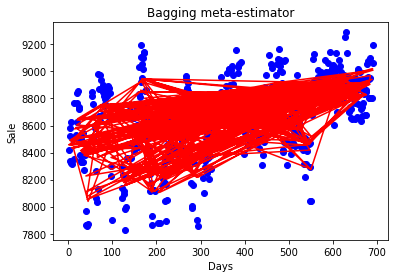

In [71]:
plt.scatter(train_X, train_y, color = 'blue')

plt.plot(train_X, bag.predict(train_X), color = 'red')
plt.title('Bagging meta-estimator')
plt.xlabel('Days')
plt.ylabel('Sale')

plt.show()

CatBoostRegressor

In [83]:
from catboost import CatBoostRegressor 

model = CatBoostRegressor()

model.fit(train_X, train_y)
preds = model.predict(val_X)
print('Mean squared error: %.2f' % (mean_squared_error(val_y, preds)))

Learning rate set to 0.034537
0:	learn: 288.3139435	total: 79.6ms	remaining: 1m 19s
1:	learn: 285.3157568	total: 83ms	remaining: 41.4s
2:	learn: 282.9030653	total: 86.3ms	remaining: 28.7s
3:	learn: 280.2428911	total: 89.6ms	remaining: 22.3s
4:	learn: 277.5921793	total: 92.7ms	remaining: 18.4s
5:	learn: 274.7783212	total: 95.7ms	remaining: 15.9s
6:	learn: 272.3457982	total: 98.8ms	remaining: 14s
7:	learn: 270.1724674	total: 102ms	remaining: 12.6s
8:	learn: 268.6159632	total: 105ms	remaining: 11.5s
9:	learn: 266.3715589	total: 108ms	remaining: 10.7s
10:	learn: 264.7526420	total: 111ms	remaining: 9.97s
11:	learn: 263.4788546	total: 114ms	remaining: 9.37s
12:	learn: 262.0992305	total: 116ms	remaining: 8.8s
13:	learn: 260.3743196	total: 119ms	remaining: 8.39s
14:	learn: 258.4390798	total: 122ms	remaining: 8.02s
15:	learn: 256.2732456	total: 125ms	remaining: 7.7s
16:	learn: 254.4648515	total: 128ms	remaining: 7.42s
17:	learn: 252.8133829	total: 131ms	remaining: 7.16s
18:	learn: 251.6235001	t

lightgbm

In [84]:
import lightgbm as lgb

lg = lgb.LGBMRegressor()
lg = lg.fit(train_X, train_y)
predict_l = lg.predict(val_X)
print('Mean squared error: %.2f' % (mean_squared_error(val_y, predict_l)))

Mean squared error: 25469.76


In [85]:
test = np.array(test)
test = test.reshape(-1, 1)
test

array([[693],
       [694],
       [695],
       [696],
       [697],
       [698],
       [699],
       [700],
       [701],
       [702],
       [703],
       [704],
       [705],
       [706],
       [707],
       [708],
       [709],
       [710],
       [711],
       [712],
       [713],
       [714],
       [715],
       [716],
       [717],
       [718],
       [719],
       [720],
       [721],
       [722],
       [723],
       [724],
       [725],
       [726],
       [727],
       [728],
       [729],
       [730],
       [731],
       [732],
       [733],
       [734],
       [735],
       [736],
       [737],
       [738],
       [739],
       [740],
       [741],
       [742],
       [743],
       [744],
       [745],
       [746],
       [747],
       [748],
       [749],
       [750],
       [751],
       [752],
       [753],
       [754],
       [755],
       [756],
       [757],
       [758],
       [759],
       [760],
       [761],
       [762],
       [763],
      

In [86]:
bag = BaggingRegressor(base_estimator = xg, n_estimators = 108, random_state = 0).fit(X, y)

[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [87]:
predict = bag.predict(test)


In [88]:
df = pd.DataFrame(predict,columns = ['GrocerySales'])
df.head()

,GrocerySales
0,8964.335938
1,8964.335938
2,8964.335938
3,8964.335938
4,8964.335938


In [89]:
df.to_excel('submission2.xlsx')